In [81]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
import numpy as np
okt = Okt()
kkma = Kkma()

In [129]:

news = pd.read_csv('../김나윤/하이닉스 뉴스 데이터 완성본.csv', encoding='ANSI')
news.head()



,날짜,제목,내용
0,2022.06.24 06:00,삼전·하이닉스 언제 반등?....미 반도체 지수 '촉각',기사내용 요약美필라델피아 반도체 지수 올 들어 33%↓ 하반기 업황도 '흐림'…주가...
1,2022.06.24 06:02,"SK하이닉스, 올해도 반도체 인재 육성 프로그램 실시",[비즈니스 플라자]SK하이닉스가 인재 채용이 필요한 우수 협력사와 취업 준비생을 연...
2,2022.06.24 08:09,"SK하이닉스, 매크로 악재로 메모리 수급 지연…목표가↓-NH",[이데일리 안혜신 기자] NH투자증권은 24일 SK하이닉스(000660)에 대해 ...
3,2022.06.24 08:53,"NH투자증권 “SK하이닉스, 메모리 수급 개선 지연...목표주가 14만원 하향”","글로벌 금리 인상, 유럽 전쟁, 중국 봉쇄 등으로 IT 제품 수요 부진메모리 공급 ..."
4,2022.06.24 18:38,"中, SK하이닉스 키파운드리 인수 승인",SK하이닉스 이천 로고. /연합뉴스 중국이 파운드리(반도체 위탁생산) ...


In [6]:
# num_data.loc[(num_data['변화량'] > 0), '변화량'] = 1
# num_data.loc[(num_data['변화량'] == 0), '변화량'] = 0.5
# num_data.loc[(num_data['변화량'] < 0), '변화량'] = 0

In [147]:

data = pd.read_csv('../김나윤/SK하이닉스 주식 데이터.csv', encoding='ANSI')
data['변화량'] = data['종가'] - data['시가']
data.head()

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매도수량,누적체결매수수량,변화량
0,A000660,SK하이닉스,20210616,901,128000.0,128500.0,127500.0,127500.0,30265.0,49670.0,0.0,0.0,-500.0
1,A000660,SK하이닉스,20210616,902,127500.0,128000.0,127500.0,127500.0,31521.0,50538.0,0.0,0.0,0.0
2,A000660,SK하이닉스,20210616,903,127500.0,128000.0,127500.0,128000.0,32558.0,51335.0,0.0,0.0,500.0
3,A000660,SK하이닉스,20210616,904,128000.0,128000.0,127500.0,128000.0,34810.0,52083.0,0.0,0.0,0.0
4,A000660,SK하이닉스,20210616,905,128000.0,128000.0,127500.0,127500.0,88528.0,52996.0,0.0,0.0,-500.0


In [148]:
data['날짜'] = data['날짜'].astype(str)
data['시간'] = data['시간'].astype(str)

data['date'] = data['날짜'] + ' ' + data['시간']

In [150]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d %H%M', errors='raise')

ValueError: time data "20210616 901" at position 0 doesn't match format specified

In [154]:

# data['날짜'] = data['날짜'].astype(str)
# data['시간'] = data['시간'].astype(str)

# data['date'] = data['날짜'] + ' ' + data['시간']
#data['date'] = pd.to_datetime(data['date'])
#data['date'] = data['data'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %'))
#data['date'] = pd.to_datetime(data['date'], format='%Y%m%d %H%M', errors='raise')
#data.to_csv('../김나윤/SK하이닉스 주식 데이터.csv')
#data['변화량'] = data['종가']-data['시가']

# #data['날짜'] = pd.to_datetime(data['날짜'])
# data['날짜'].min()
data.head()

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매도수량,누적체결매수수량,변화량,date
0,A000660,SK하이닉스,20210616,901,128000.0,128500.0,127500.0,127500.0,30265.0,49670.0,0.0,0.0,-500.0,2021-06-16 09:01:00
1,A000660,SK하이닉스,20210616,902,127500.0,128000.0,127500.0,127500.0,31521.0,50538.0,0.0,0.0,0.0,2021-06-16 09:02:00
2,A000660,SK하이닉스,20210616,903,127500.0,128000.0,127500.0,128000.0,32558.0,51335.0,0.0,0.0,500.0,2021-06-16 09:03:00
3,A000660,SK하이닉스,20210616,904,128000.0,128000.0,127500.0,128000.0,34810.0,52083.0,0.0,0.0,0.0,2021-06-16 09:04:00
4,A000660,SK하이닉스,20210616,905,128000.0,128000.0,127500.0,127500.0,88528.0,52996.0,0.0,0.0,-500.0,2021-06-16 09:05:00


In [79]:
# news['날짜'] = pd.to_datetime(news['날짜'])
# data['날짜'] = pd.to_datetime(data['날짜'], '%y-%m-%d %H:%M:%S')

In [84]:
news.info(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3280 non-null   object
 1   제목      3280 non-null   object
 2   내용      3275 non-null   object
dtypes: object(3)
memory usage: 77.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190379 entries, 0 to 190378
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   종목코드      190379 non-null  object 
 1   종목명       190379 non-null  object 
 2   날짜        190379 non-null  int64  
 3   시간        190379 non-null  int64  
 4   시가        190379 non-null  float64
 5   고가        190379 non-null  float64
 6   저가        190379 non-null  float64
 7   종가        190379 non-null  float64
 8   거래량       190379 non-null  float64
 9   거래대금      190379 non-null  float64
 10  누적체결매도수량  190379 non-null  float64
 11  누적체결매수수량  190379 non-null  float64
 1

(None, None)

In [80]:
print (news['날짜'].min(), news['날짜'].max())
print (data['날짜'].min(), data['날짜'].max())

2022-06-24 06:00:00 2023-06-23 16:36:00
1970-01-01 00:00:00.020210616 1970-01-01 00:00:00.020230623


In [45]:
# # f = pd.merge(num_data, news_data)
# print(pd.merge(news_data, num_data, left_on='날짜', right_on='날짜'))

Empty DataFrame
Columns: [날짜, 제목, 내용, 시간, Year, Month, Day, 변화량]
Index: []


전처리

In [6]:
import re
regex = r'[^\w\s]'
# text 열의 모든 값을 대상으로 정규표현식을 적용하여 특수문자를 제거
news_data['clean_content'] = news_data['내용'].apply(lambda x: re.sub(regex, '', str(x)))
news_data['clean_content'][0]

'2730일 나흘동안 5000인분 간식 준비삼성바이오로직스는 27일월부터 30일목까지 임직원 사기진작을 위한 푸드트럭 행사를 진행한다 삼성바이오로직스  바이오파크에 설치된 푸드트럭에 임직원들이 간식을 받아가고 있다삼성바이오로직스 제공 삼성바이오로직스207940가 푸드트럭 이벤트로 임직원 사기 진작에 나섰다고 29일 밝혔다 지난 27일부터 30일까지 나흘간 진행되는 이 행사에는 총 5000인분의 간식이 준비됐다 점심시간뿐만 아니라 24시간 교대로 근무하는 직원들을 위해 야간 시간대에도 푸드트럭을 추가 운영한다삼성바이오로직스는 어려운 경영환경 속에서도 우수한 성과를 위해 노력해 주고 있는 임직원들에게 감사의 뜻을 전하는 취지에서 이번 이벤트를 기획했다고 한다 삼성바이오로직스는 지난해 9월 모더나 백신 첫 배치 생산 기념을 시작으로 푸드트럭 이벤트를 해 왔다 올해 4월에는 1분기 영업이익률 목표 달성을 기념해 푸드트럭 행사를 진행했다 올해 하반기에도 이 같은 행사를  계획하고 있다삼성바이오로직스는 역동적인 기업문화를 만들기 위한 다양한 프로그램을 운영 중이다 신입사원이 경영진의 멘토가 되어 상호 경험을 공유하는 리버스 멘토링Reverse Mentoring 프로그램이 대표적이다이 프로그램을 통해 글램핑 타로점보기 등 MZ세대의 문화생활을 함께 체험하며 세대간 벽을 허물고 공감대를 형성하고 있다는 것이 회사의 설명이다 또 임직원 공청회를 통해 임직원들의 다양한 의견을 청취해 회사 정책 수립 및 복지제도 개선에 반영하고 있다고 한다삼성바이오로직스는 이달 잡코리아가 대학생 및 취업 준비생 1000여명을 대상으로 실시한 설문조사에서바이오제약의료분야 가장 취업하고 싶은 기업 1위로 꼽히는 등 입사하고 싶은 회사로 꼽히기도 했다삼성바이오로직스 관계자는 푸드트럭은 존림 대표이사의 아이디어라며 존림 대표는 평소 사내 구성원이 원 팀으로 상호존중하고 활발하게 소통하는 조직문화가 중요하다고 강조해왔다고 설명했다 글로벌 정보마케팅센터 가르시아 코트니 프로는 푸드트럭 행사는 다양한 국적의

In [8]:
#!pip install konlpy
from konlpy.tag import Kkma        
kkma = Kkma()
from konlpy.tag import Hannanum    
hannanum = Hannanum()
from konlpy.tag import Okt         
t = Okt() 
from konlpy.tag import *
import nltk
import pickle
import copy
from tqdm import tqdm

In [7]:
news_data['clean_content']

0      2730일 나흘동안 5000인분 간식 준비삼성바이오로직스는 27일월부터 30일목까지...
1      삼성바이오로직스가 감사의 푸드트럭 이벤트를 통한 임직원 사기 진작에 나섰다지난 27...
2       원팀 강조 존림 대표 아이디어삼성바이오로직스 푸드트럭 사진삼성바이오로직스삼성바이오...
3      삼성바이오로직스가 푸드트럭 이벤트로 임직원 사기진작에 나섰다 지난 27일부터 30일...
4      존림 대표이사 아이디어로 시작어려운 경영환경 속 임직원 노고 격려삼성바이오로직스 푸...
                             ...                        
668    中 우시 바이오로직스에 이어 日 후지필름도 투자 확대 승부수삼바 글로벌 톱5 수성 ...
669    삼성바이오로직스 4공장 조감도삼성바이오로직스가 초격차 수주 경쟁력을 바탕으로 글로벌...
670    인천 연수구에 있는 삼성바이오로직스 본사 뉴스1        삼성바이오로직스삼성바이...
671     삼성바이오로직스가 롯데바이오로직스를 상대로 영업비밀침해 금지 가처분 신청을 제기했...
672     이데일리 김지완 기자 삼성바이오로직스207940 하반기 실적 전망에 청신호가 켜졌...
Name: clean_content, Length: 673, dtype: object

In [9]:
pos_tag = []

# news_data 데이터프레임의 각 행에 대해 반복
for _, row in tqdm(news_data.iterrows()):
    # 현재 행의 content 값을 news_text 변수에 할당
    news_text = row['clean_content']
    
    # PosTagging
    tokens_ko = t.pos(news_text)
    pos_tag.append(tokens_ko)

673it [00:29, 22.74it/s]


In [10]:
#첫번째 행의 Pos Tagging
print(pos_tag[0])

[('2730일', 'Number'), ('나흘', 'Noun'), ('동안', 'Noun'), ('5000', 'Number'), ('인분', 'Noun'), ('간식', 'Noun'), ('준비', 'Noun'), ('삼', 'Modifier'), ('성', 'Modifier'), ('바이오', 'Noun'), ('로', 'Josa'), ('직스', 'Noun'), ('는', 'Josa'), ('27일', 'Number'), ('월부터', 'Foreign'), ('30일', 'Number'), ('목까지', 'Foreign'), ('임', 'Noun'), ('직원', 'Noun'), ('사', 'Modifier'), ('기', 'Modifier'), ('진작', 'Noun'), ('을', 'Josa'), ('위', 'Noun'), ('한', 'Josa'), ('푸드', 'Noun'), ('트럭', 'Noun'), ('행사', 'Noun'), ('를', 'Josa'), ('진행', 'Noun'), ('한다', 'Verb'), ('삼', 'Modifier'), ('성', 'Modifier'), ('바이오', 'Noun'), ('로', 'Josa'), ('직스', 'Noun'), ('바이오', 'Noun'), ('파크', 'Noun'), ('에', 'Josa'), ('설치', 'Noun'), ('된', 'Verb'), ('푸드', 'Noun'), ('트럭', 'Noun'), ('에', 'Josa'), ('임', 'Noun'), ('직원', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('간식', 'Noun'), ('을', 'Josa'), ('받아가고', 'Verb'), ('있다', 'Adjective'), ('삼성', 'Noun'), ('바이오', 'Noun'), ('로', 'Josa'), ('직스', 'Noun'), ('제공', 'Noun'), ('삼', 'Modifier'), ('성', 'Modifier'), ('바이오', 'No

In [11]:
normalization_li = []
for pos in pos_tag: 
    in_li = []
    for ele in pos:
        #품사가 조사, 접속사이면 continue
        if ele[1] in ['Josa','Suffix']:
            continue
        in_li.append(ele[0])
    normalization_li.append(in_li)
print(normalization_li[0])

['2730일', '나흘', '동안', '5000', '인분', '간식', '준비', '삼', '성', '바이오', '직스', '27일', '월부터', '30일', '목까지', '임', '직원', '사', '기', '진작', '위', '푸드', '트럭', '행사', '진행', '한다', '삼', '성', '바이오', '직스', '바이오', '파크', '설치', '된', '푸드', '트럭', '임', '직원', '간식', '받아가고', '있다', '삼성', '바이오', '직스', '제공', '삼', '성', '바이오', '직스', '207940', '가', '푸드', '트럭', '이벤트', '임', '직원', '사기', '진작', '나섰다고', '29일', '밝혔다', '지난', '27일', '부터', '30일', '까지', '나흘', '진행', '되는', '이', '행사', '총', '5000', '인분', '간식', '준비', '됐다', '점심시간', '아니라', '24시간', '교대', '근무', '하는', '직원', '위해', '야간', '시간대', '푸드', '트럭', '추가', '운영', '한다', '삼성', '바이오', '직스', '어려운', '경영', '환경', '속', '우수한', '성과', '위해', '노력', '해', '주고', '있는', '임', '직원', '감사', '뜻', '전하', '취지', '이번', '이벤트', '기획', '했다고', '한다', '삼', '성', '바이오', '직스', '지난해', '9월', '모', '더', '백신', '첫', '배치', '생산', '기념', '시작', '푸드', '트럭', '이벤트', '해', '왔다', '올해', '4월', '에는', '1분', '기', '영업', '이익', '률', '목표', '달성', '기념', '해', '푸드', '트럭', '행사', '진행', '했다', '올해', '하반기', '이', '같은', '행사', '계획', '있다', '삼성', '바이오', '직스', '역', '

In [12]:
with open('../김나윤/data/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거
okt = Okt()

In [13]:
tokens = normalization_li
token_stop = []
for token in tokens:
    in_li = []
    for tok in token:
        if tok not in stopwords:
            in_li.append(tok)
    token_stop.append(in_li)
print(token_stop[0]) 

['2730일', '나흘', '5000', '인분', '간식', '준비', '성', '바이오', '직스', '27일', '월부터', '30일', '목까지', '임', '직원', '기', '진작', '위', '푸드', '트럭', '행사', '진행', '한다', '성', '바이오', '직스', '바이오', '파크', '설치', '된', '푸드', '트럭', '임', '직원', '간식', '받아가고', '삼성', '바이오', '직스', '제공', '성', '바이오', '직스', '207940', '푸드', '트럭', '이벤트', '임', '직원', '사기', '진작', '나섰다고', '29일', '밝혔다', '지난', '27일', '30일', '나흘', '진행', '되는', '행사', '총', '5000', '인분', '간식', '준비', '됐다', '점심시간', '아니라', '24시간', '교대', '근무', '하는', '직원', '위해', '야간', '시간대', '푸드', '트럭', '추가', '운영', '한다', '삼성', '바이오', '직스', '어려운', '경영', '환경', '속', '우수한', '성과', '위해', '노력', '해', '주고', '있는', '임', '직원', '감사', '뜻', '전하', '취지', '이벤트', '기획', '했다고', '한다', '성', '바이오', '직스', '지난해', '9월', '더', '백신', '첫', '배치', '생산', '기념', '시작', '푸드', '트럭', '이벤트', '해', '왔다', '올해', '4월', '에는', '1분', '기', '영업', '이익', '률', '목표', '달성', '기념', '해', '푸드', '트럭', '행사', '진행', '했다', '올해', '하반기', '같은', '행사', '계획', '삼성', '바이오', '직스', '역', '동', '적', '기업', '문화', '만들기', '위', '다양한', '프로그램', '운영', '중이', '신입사원', '경영', '진의', '

In [14]:
df_li = []
for tokens in token_stop:
    token = ' '.join(tokens)
    df_li.append(token)
df = pd.DataFrame(df_li).rename(columns = {0:'preprocess_context'})
df.head()

,preprocess_context
0,2730일 나흘 5000 인분 간식 준비 성 바이오 직스 27일 월부터 30일 목까...
1,성 바이오 직스 감사 푸드 트럭 이벤트 통한 임 직원 사기 진작 나섰다지난 27일 ...
2,원 팀 강조 존림 대표 아이디어 성 바이오 직스 푸드 트럭 진삼 바이오 직스 삼성 ...
3,성 바이오 직스 푸드 트럭 이벤트 임 직원 기 진작 나섰다 지난 27일 30일 진행...
4,존림 대표이사 아이디어 시작 어려운 경영 환경 속 임 직원 노고 격려 성 바이오 직...


In [16]:
news_data = pd.concat([news_data,df],axis=1)
#비어있는 5개의 행은 '없음'으로 결측치 처리
news_data['내용'] = news_data['내용'].fillna('없음')
news_data['preprocess_context'] = news_data['preprocess_context'].fillna('없음')
news_data.head()

,날짜,제목,내용,clean_content,preprocess_context,preprocess_context
0,2022.06.29 09:50,"‘제약⋅바이오 가장 일하고 싶은 기업 1위’ 삼성바이오로직스, 임직원에 ‘감사의 푸...",27~30일 나흘동안 5000인분 간식 준비삼성바이오로직스는 27일(월)부터 30일...,2730일 나흘동안 5000인분 간식 준비삼성바이오로직스는 27일월부터 30일목까지...,2730일 나흘 5000 인분 간식 준비 성 바이오 직스 27일 월부터 30일 목까...,2730일 나흘 5000 인분 간식 준비 성 바이오 직스 27일 월부터 30일 목까...
1,2022.06.29 10:15,"삼성바이오로직스, '감사의 푸드트럭' 통해 임직원 격려",삼성바이오로직스가 '감사의 푸드트럭' 이벤트를 통한 임직원 사기 진작에 나섰다.지난...,삼성바이오로직스가 감사의 푸드트럭 이벤트를 통한 임직원 사기 진작에 나섰다지난 27...,성 바이오 직스 감사 푸드 트럭 이벤트 통한 임 직원 사기 진작 나섰다지난 27일 ...,성 바이오 직스 감사 푸드 트럭 이벤트 통한 임 직원 사기 진작 나섰다지난 27일 ...
2,2022.06.29 10:44,"삼성바이오로직스, 임직원에 '감사 푸드트럭' 이벤트",['원팀' 강조 존림 대표 아이디어]삼성바이오로직스 푸드트럭 /사진=삼성바이오로직...,원팀 강조 존림 대표 아이디어삼성바이오로직스 푸드트럭 사진삼성바이오로직스삼성바이오...,원 팀 강조 존림 대표 아이디어 성 바이오 직스 푸드 트럭 진삼 바이오 직스 삼성 ...,원 팀 강조 존림 대표 아이디어 성 바이오 직스 푸드 트럭 진삼 바이오 직스 삼성 ...
3,2022.06.29 11:24,"삼성바이오로직스, 임직원에 ‘감사의 푸드트럭’",삼성바이오로직스가 푸드트럭 이벤트로 임직원 사기진작에 나섰다. 지난 27일부터 30...,삼성바이오로직스가 푸드트럭 이벤트로 임직원 사기진작에 나섰다 지난 27일부터 30일...,성 바이오 직스 푸드 트럭 이벤트 임 직원 기 진작 나섰다 지난 27일 30일 진행...,성 바이오 직스 푸드 트럭 이벤트 임 직원 기 진작 나섰다 지난 27일 30일 진행...
4,2022.06.29 11:44,"삼성바이오로직스, '오·떡·순' 쏜다…임직원에게 감사의 푸드트럭 제공",존림 대표이사 아이디어로 시작…어려운 경영환경 속 임직원 노고 격려삼성바이오로직스 ...,존림 대표이사 아이디어로 시작어려운 경영환경 속 임직원 노고 격려삼성바이오로직스 푸...,존림 대표이사 아이디어 시작 어려운 경영 환경 속 임 직원 노고 격려 성 바이오 직...,존림 대표이사 아이디어 시작 어려운 경영 환경 속 임 직원 노고 격려 성 바이오 직...


In [19]:
news_data.to_csv('삼성바이오로직스_preprocess.csv', index=False, encoding='utf-8-sig')

In [17]:
import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma        ; kkma = Kkma()
from konlpy.tag import Hannanum    ; hannanum = Hannanum()
from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *
import nltk
import pickle

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz
from sklearn.tree import export_graphviz

import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [22]:
삼성바이오로직스_preprocess = pd.read_csv('삼성바이오로직스_preprocess.csv')

In [23]:
news_text = ''
news_data = 삼성바이오로직스_preprocess.reset_index(drop=True)
for _, row in news_data.iterrows():
    news_text += row['preprocess_context']

In [24]:
tokens_ko = t.morphs(news_text)
ko = nltk.Text(tokens_ko)

print(len(ko.tokens))          # 토큰 전체 개수
print(len(set(ko.tokens)))     # 토큰 unique 개수
print(ko.vocab().most_common(20))

206737
12270
[('바이오', 7405), ('직스', 4194), ('성', 4095), ('했다', 2853), ('생산', 2266), ('공장', 2197), ('매출', 1558), ('할', 1267), ('글로벌', 1126), ('의약품', 1101), ('삼성', 1083), ('해', 1081), ('4', 1078), ('영업', 1029), ('기업', 964), ('전', 963), ('하는', 924), ('기', 918), ('수', 907), ('이익', 831)]


In [25]:
# stop_words = ['\n',"'",'…',',','[',']','(',')','"','주','에','코스닥','특징','종목','·','장','코스피','증시','-','적',\
#               '도','기술','분석','마감','‘','`','요약','가','’','의','이','오전','★','은','“','대','”','한','B','로',\
#               '?','3','선','A','오후','는','5','!','"…','상','들','1','만에','제','2','…"','20','일','서','명',"'…",'기',\
#               '···','10','소','등','으로','자','전','률','미','...','50','세','시','안','폭',"…'",'만','9','VI','까지',\
#               '눈','더','e','량','고','인','52','성','띄네','1%','부터','다','감','을','지','4','에도','수','7','것','째',\
#              '체크','기','···','중','계','관련','왜','1억원','총','내','과','젠','또','연','엔','차','굿모닝','할','8','.',\
#              '보다','새','주간','전망','추천','이슈','플러스','사','개월','때','..','임','속','’…','G','나','개','원','에서',\
#              '하는','이유','달','→','권','?…','단독','간','배','30','K','저','와','하','/','1조','6','두','해야','분','형',\
#              '황','공','&','앞두고','보','문','이번','익','X','1억',']"','치','산','를','오','해','S','우리','그','된','준','▶',\
#              '건','재','반','라','10년','초','3분','월','신','p','급','조','줄','경','했다','구','진','이어','올','발','vs','강',\
#              '국','9억','1년','난','판','면','"(','`…','살','아','인데','번','텍','팜','8월','Q','메','2년','점','하고','10월',\
#              'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','40','타','~','9월','2100','30%','땐','말','한다','요',\
#              "',",'스','…`','단','16','길','12','3억','회','될까','호','용','2조','번째','일까','듯','최','하다','이다','되다']

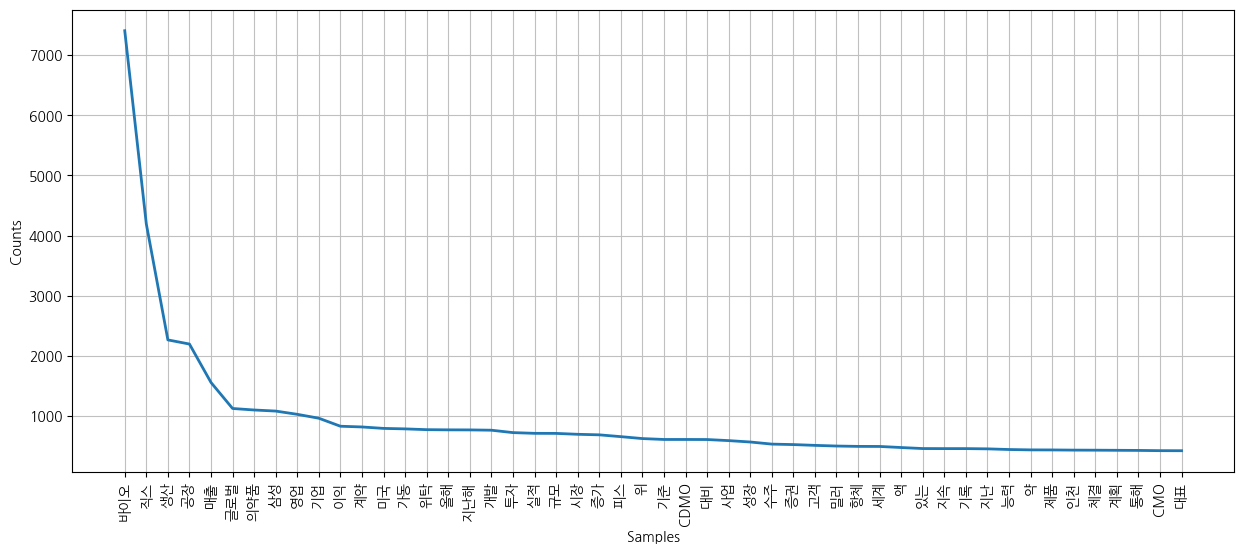

In [26]:
tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stop_words]

ko = nltk.Text(tokens_ko)

# 그래프에서 한글 폰트가 깨질 경우 실행
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
# rc('font', family=font_name)

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

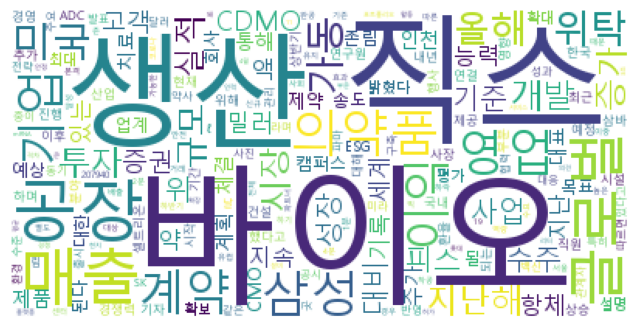

In [27]:
data = ko.vocab().most_common(300)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
#!pip install transformers
import pandas as pd
import numpy as np
import re
import os
from transformers import pipeline

                                              0.0/7.2 MB ? eta -:--:--
                                              0.0/7.2 MB 660.6 kB/s eta 0:00:11
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.2 MB 180.8 kB/s eta 0:00:40
                                              0.1/7.2 MB 204.8 kB/s